Segment the dog from the image `doggo.jpg`, isolating it from the background.









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, transform
from skimage.color import rgb2gray
from typing import Tuple, Optional, List, Dict
from scipy import ndimage, signal
from skimage.filters.rank import entropy
from skimage.morphology import closing, opening, square, footprint_rectangle, disk
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from skimage.feature import graycomatrix, graycoprops
from skimage.util.shape import view_as_windows
from scipy import ndimage
import warnings
from scipy import fft
from scipy.signal import find_peaks
from scipy.ndimage import binary_dilation

In [42]:
path = "/content/doggo.jpg"
img = cv2.imread(path, 0)

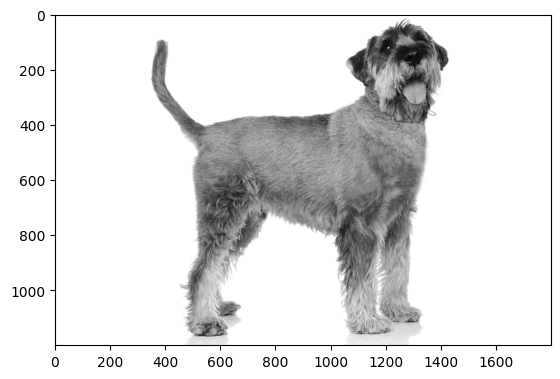

In [20]:
plt.imshow(img, cmap='gray')
plt.show()

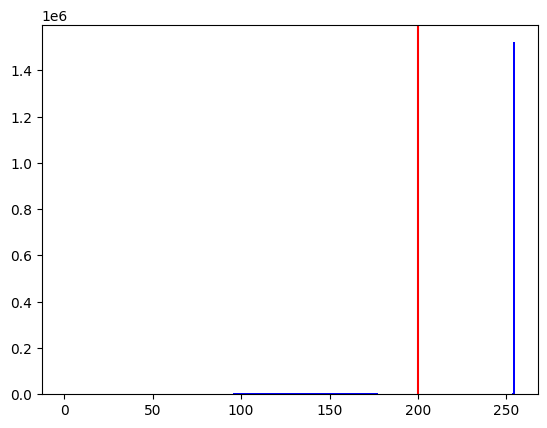

In [16]:
thresholding  = 200
plt.hist(img.ravel(), bins=256, histtype='bar', color='blue')
plt.axvline(thresholding, color='red')
plt.show()

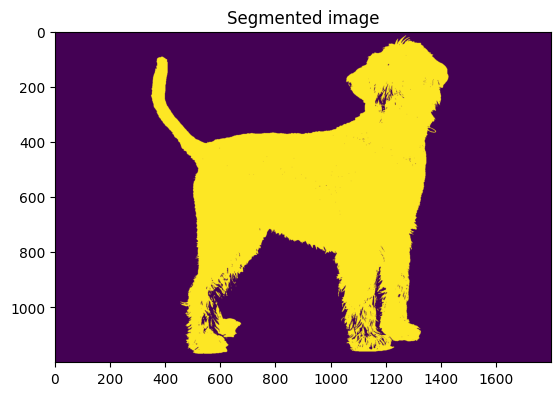

In [43]:
# Using thresholding for segmentation
seg_I = img < 200

# Display Segmentated image
plt.imshow(seg_I)
plt.title('Segmented image')
plt.show()

In [22]:
print(seg_I)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


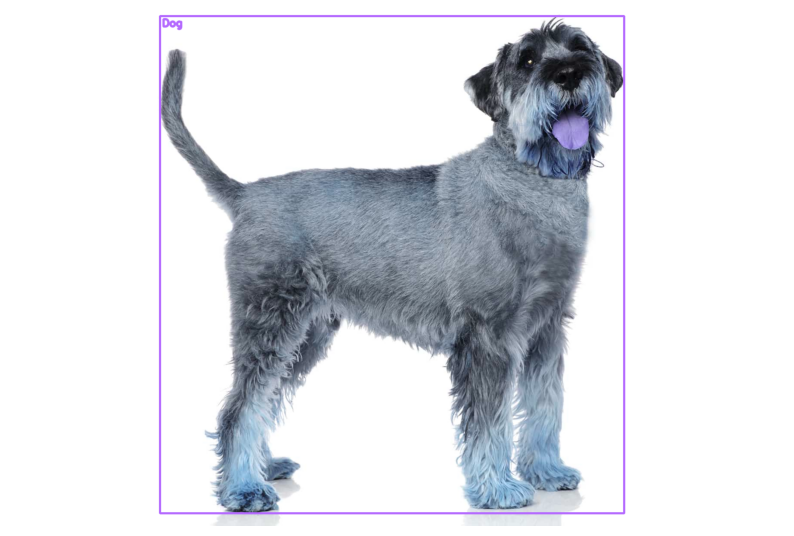

In [57]:
# Replace the white color with pink (255, 105, 180)
img = io.imread('/content/doggo.jpg')
pink_mask = np.zeros_like(img, dtype=np.uint8)
pink_mask[seg_I == True] = (255, 105, 180)

# Semi-transparent overlay of segmented area
overlay = cv2.addWeighted(img, 1, pink_mask, 0, 0)

# Convert seg_I to range from 0 to 255
seg_I = seg_I.astype(np.uint8) * 255

# Looking for the contours of the pothole
contours, _ = cv2.findContours(seg_I, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small contours
min_contour_area = 5000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

# Draw a border on the final image (overlay)
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 105, 180), 3)  # Red rectangle

    # Add a "Dog" caption above the frame
    text_x = x + 5
    text_y = max(y - 10, 40)
    cv2.putText(
        overlay, "Dog", (text_x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 105, 180), 3, cv2.LINE_AA
    )

# Result display
figure = plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()